# Análisis y Modelado de Datos para la Predicción de Precios de Venta de Casas

Este código realiza un análisis y modelado de datos para predecir el precio de venta de casas (`SalePrice`) utilizando un conjunto de datos de viviendas.

## Pasos Principales

### Carga y Preprocesamiento de Datos
- Importa las bibliotecas necesarias (`pandas`, `scikit-learn`, `TensorFlow`, etc.).
- Carga el conjunto de datos `train.csv`.
- Realiza una exploración inicial de los datos, incluyendo análisis de valores faltantes y estadísticas descriptivas.
- Elimina columnas irrelevantes o con muchos valores faltantes (`'Id'`, `'MiscFeature'`, `'PoolQC'`, etc.).
- Convierte variables categóricas a numéricas utilizando **Label Encoding**.
- Realiza un análisis de correlación entre variables.
- Detecta y trata valores atípicos (outliers) utilizando rangos intercuartílicos.
- Imputa valores faltantes utilizando la estrategia de la media.

### Reducción de Dimensionalidad
- Aplica **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad del conjunto de datos, seleccionando las 20 componentes principales.

### Modelado
- Divide los datos en conjuntos de entrenamiento y prueba.
- Crea un modelo de **Red Neuronal Artificial (ANN)** utilizando TensorFlow/Keras.
- Entrena el modelo con los datos de entrenamiento.
- Evalúa el rendimiento del modelo utilizando el **error absoluto medio (MAE)**.

El código busca predecir el precio de venta de viviendas utilizando un modelo de aprendizaje automático (ANN). Para ello, realiza un preprocesamiento de datos, reduce la dimensionalidad con PCA y entrena un modelo para predecir la variable objetivo `SalePrice`. Finalmente, se evalúa el rendimiento del modelo.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datos/train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#PCA e imputacion de datos
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: >

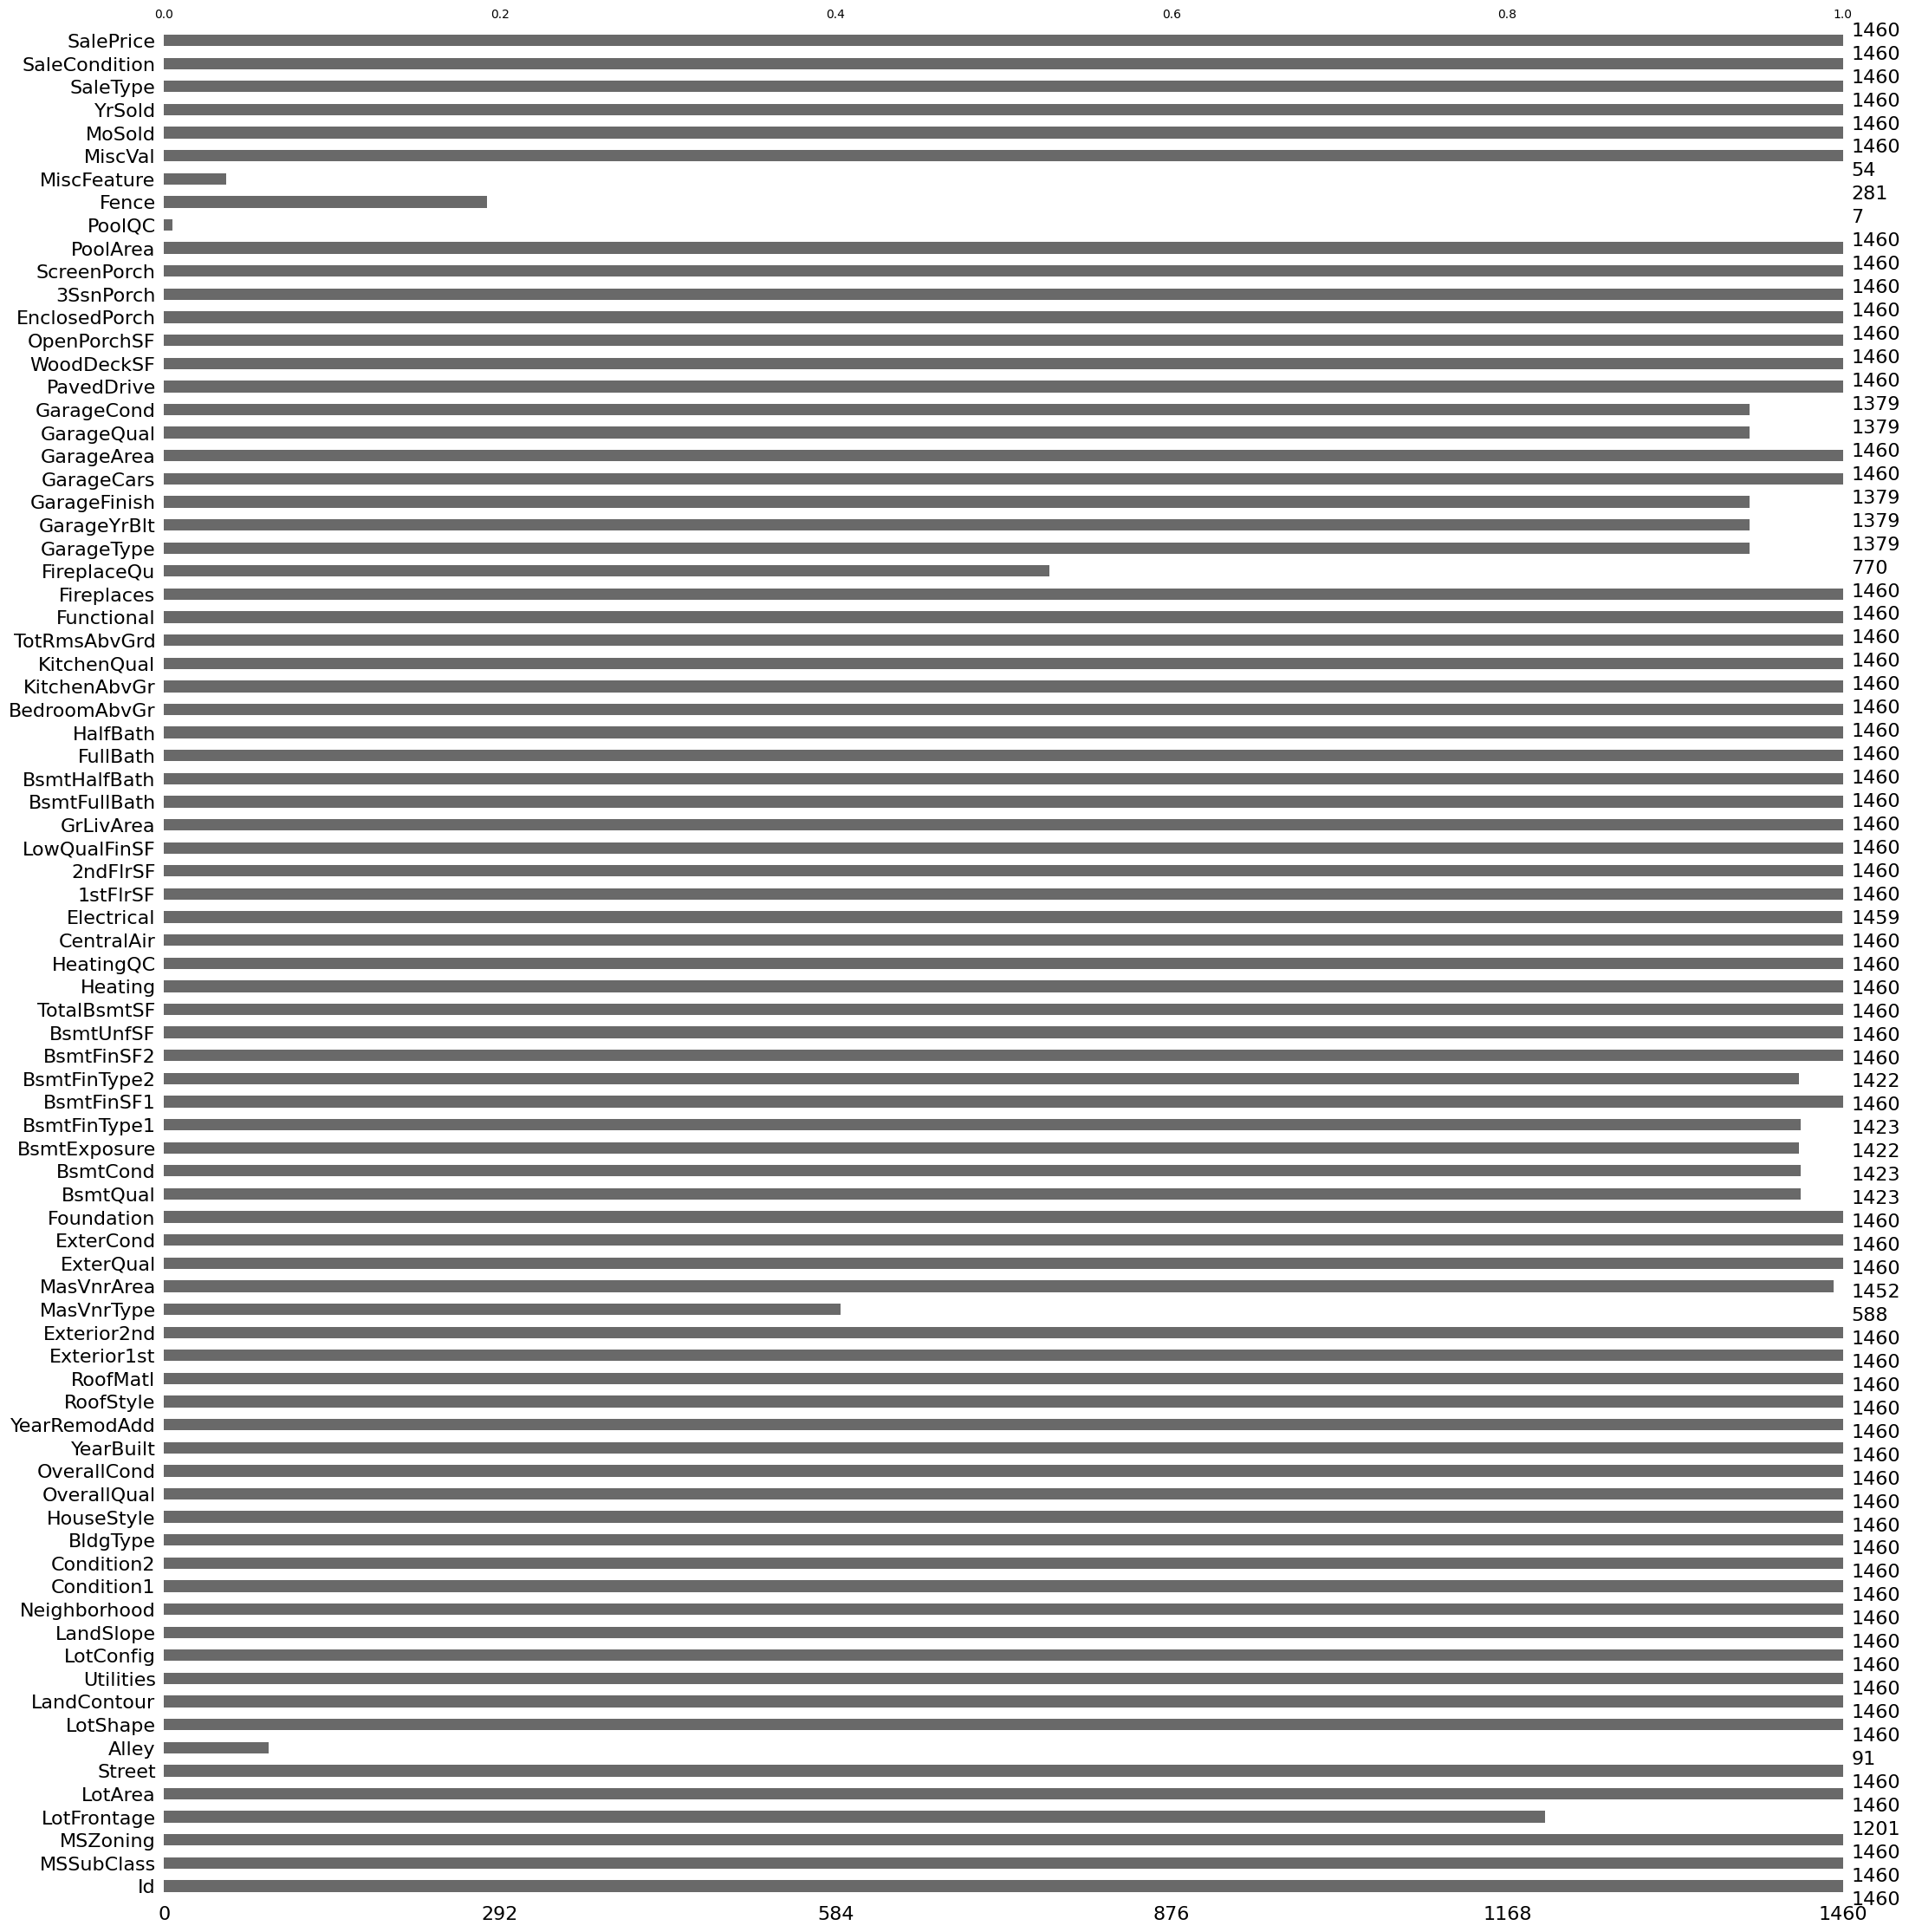

In [ ]:
msno.bar(df)

<Axes: >

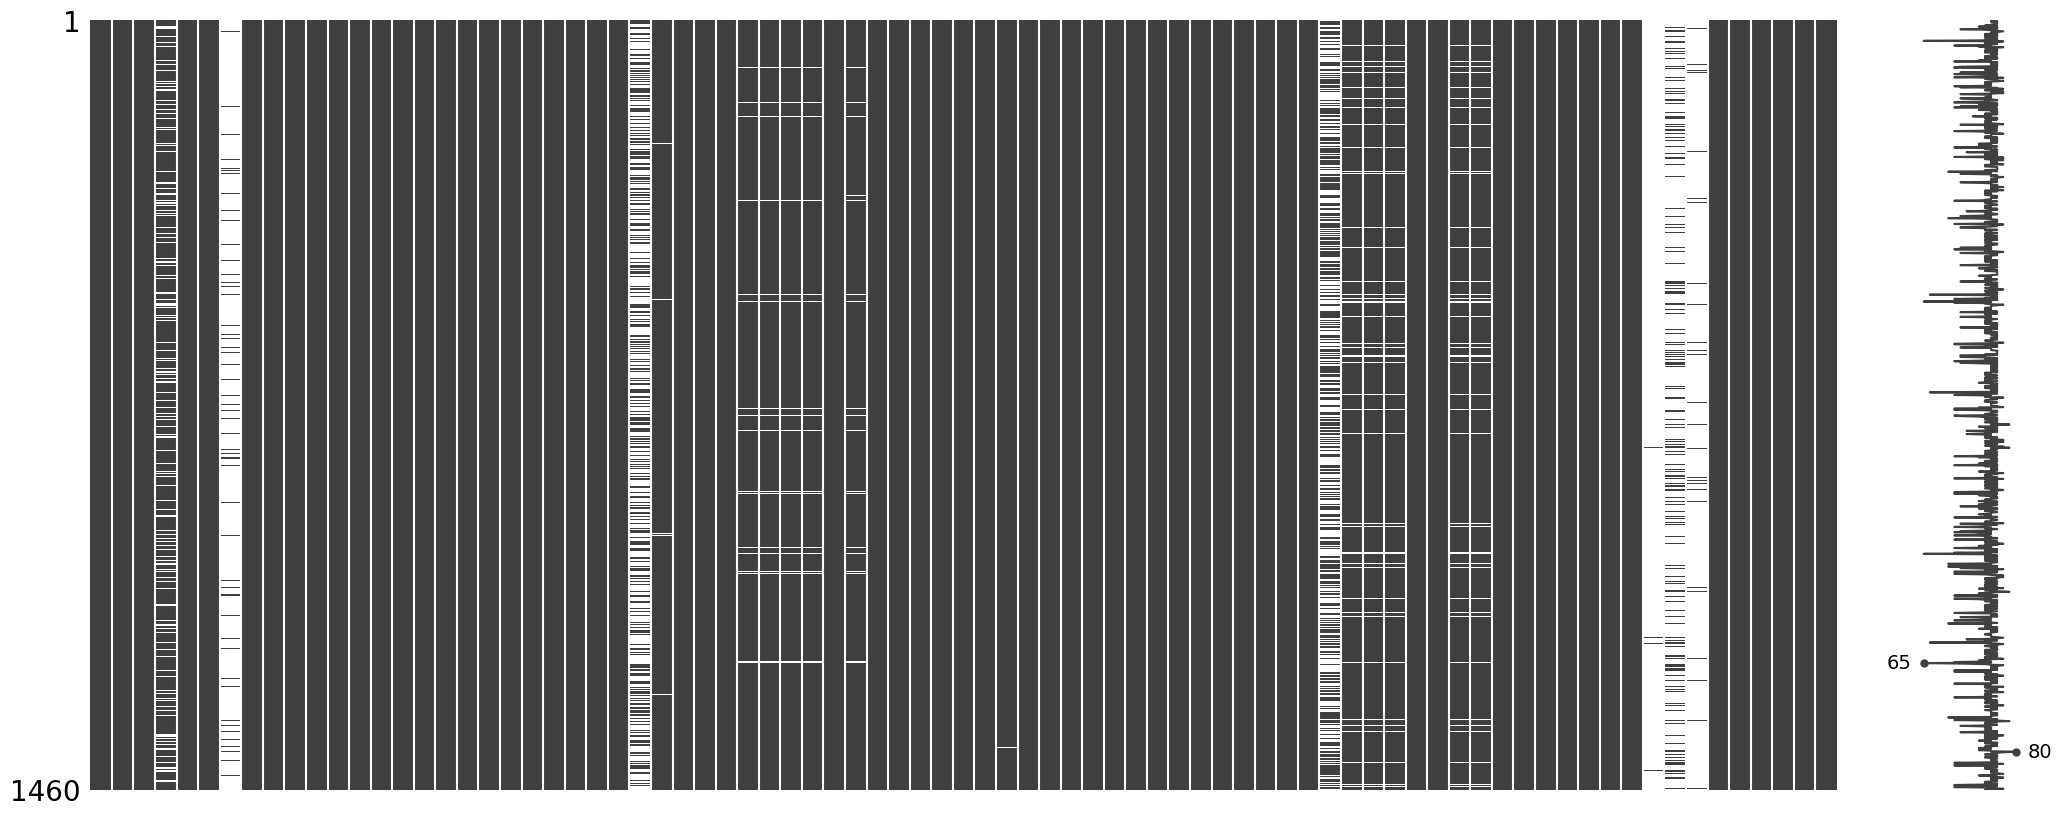

In [ ]:
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df = df.drop(columns="Id", axis=1)
df = df.drop(columns="MiscFeature", axis=1)
df = df.drop(columns="PoolQC", axis=1)
df = df.drop(columns="Fence", axis=1)
df = df.drop(columns="Alley", axis=1)
df = df.drop(columns="FireplaceQu", axis=1)
df = df.drop(columns="MasVnrType", axis=1)

In [ ]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
le = LabelEncoder()

In [ ]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [ ]:
df.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [ ]:
df.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [ ]:
df["Street"] = le.fit_transform(df["Street"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["MSZoning"] = le.fit_transform(df["MSZoning"])


In [ ]:
df.LotConfig.unique()
df.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [ ]:
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = le.fit_transform(df["LandSlope"])

In [ ]:
df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [ ]:
df["Utilities"] = le.fit_transform(df["Utilities"])

In [ ]:
df.Neighborhood.unique()
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])

In [ ]:
df.Condition1.unique()
df.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [ ]:
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])

In [ ]:
df.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [ ]:
df.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [ ]:
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])

In [ ]:
df.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [ ]:
df.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [ ]:
df.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [ ]:
df.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [ ]:
df.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [ ]:
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])

In [ ]:
df.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [ ]:
df.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [ ]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
df.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [ ]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [ ]:
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [ ]:
df.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
df["ExterQual"] = le.fit_transform(df["ExterQual"])
df["ExterCond"] = le.fit_transform(df["ExterCond"])
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = le.fit_transform(df["BsmtQual"])
df["BsmtCond"] = le.fit_transform(df["BsmtCond"])
df["BsmtExposure"] = le.fit_transform(df["BsmtExposure"])
df["BsmtFinType1"] = le.fit_transform(df["BsmtFinType1"])
df["BsmtFinType2"] = le.fit_transform(df["BsmtFinType2"])

In [ ]:
df.select_dtypes(include='object').apply(pd.Series.unique)

,0
Heating,"[GasA, GasW, Grav, Wall, OthW, Floor]"
HeatingQC,"[Ex, Gd, TA, Fa, Po]"
CentralAir,"[Y, N]"
Electrical,"[SBrkr, FuseF, FuseA, FuseP, Mix, nan]"
KitchenQual,"[Gd, TA, Ex, Fa]"
Functional,"[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]"
GarageType,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basmen..."
GarageFinish,"[RFn, Unf, Fin, nan]"
GarageQual,"[TA, Fa, Gd, nan, Ex, Po]"
GarageCond,"[TA, Fa, nan, Gd, Po, Ex]"


In [ ]:
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = le.fit_transform(df["HeatingQC"])
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = le.fit_transform(df["Electrical"])
df["KitchenQual"] = le.fit_transform(df["KitchenQual"])
df["Functional"] = le.fit_transform(df["Functional"])
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = le.fit_transform(df["GarageFinish"])
df["GarageQual"] = le.fit_transform(df["GarageQual"])
df["GarageCond"] = le.fit_transform(df["GarageCond"])
df["PavedDrive"] = le.fit_transform(df["PavedDrive"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

<Axes: >

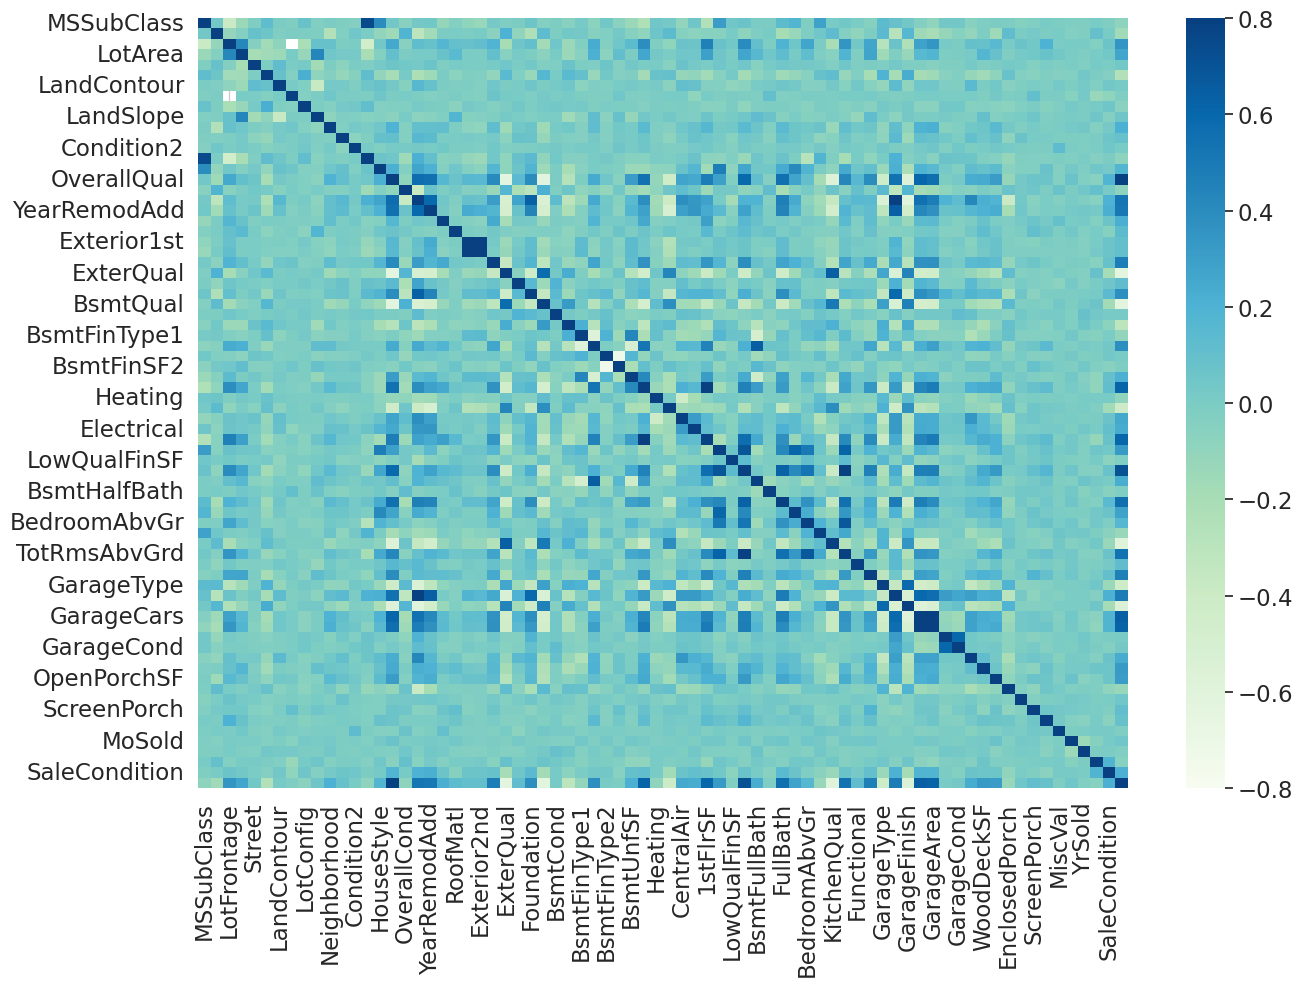

In [ ]:
sns.set(style = "whitegrid", font_scale =1.5)
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = False
            , cmap = "GnBu", vmin=-0.8, vmax=0.8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

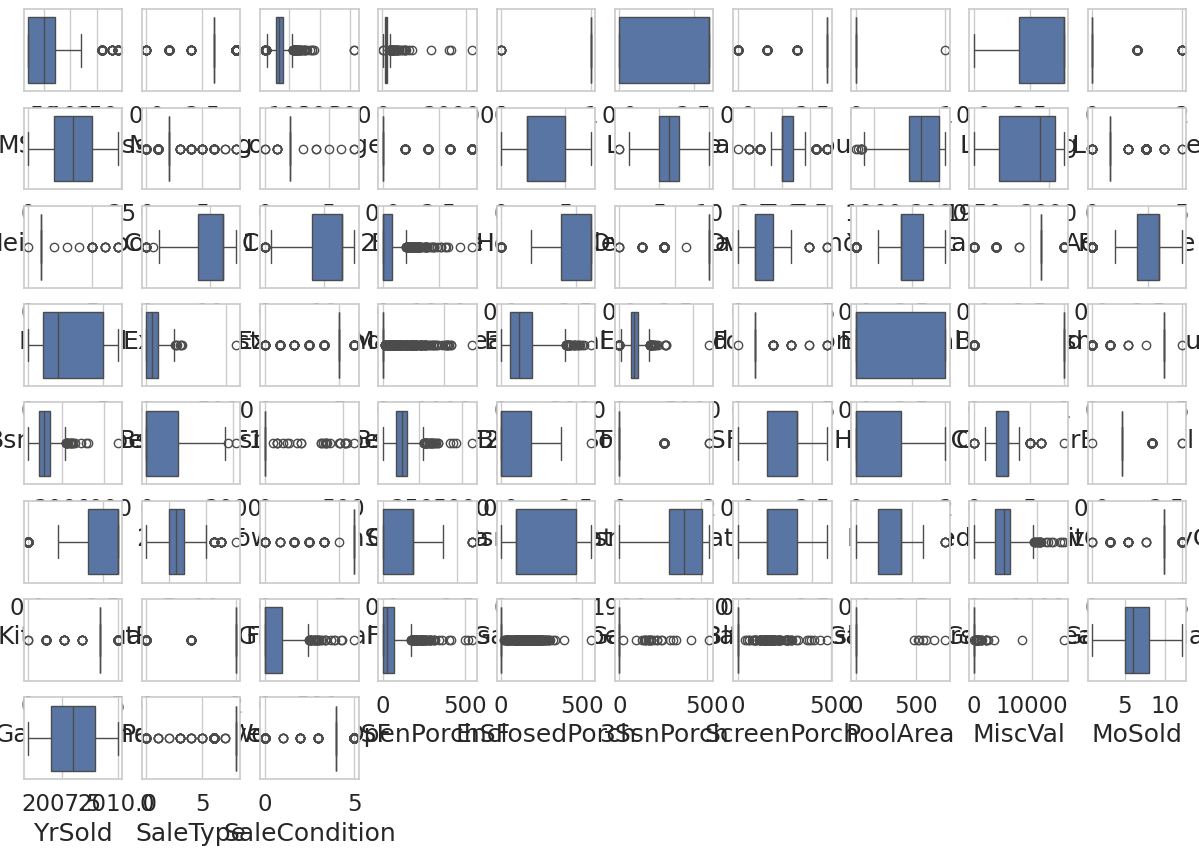

In [ ]:
plt.figure(figsize=(15,10))
c = df.columns[:-1]
for i in enumerate(c):
    plt.subplot(8,10,i[0]+1)
    sns.boxplot(x=i[1], data=df)

In [ ]:
for i in c:
    q1 = df[i].quantile(0.05)
    q4 = df[i].quantile(0.95)
    df[i][df[i] <= q1] = q1
    df[i][df[i] >= q4] = q4

<ipython-input-65-b40e923bdbb9>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i][df[i] <= q1] = q1
<ipython-input-65-b40e923bdbb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

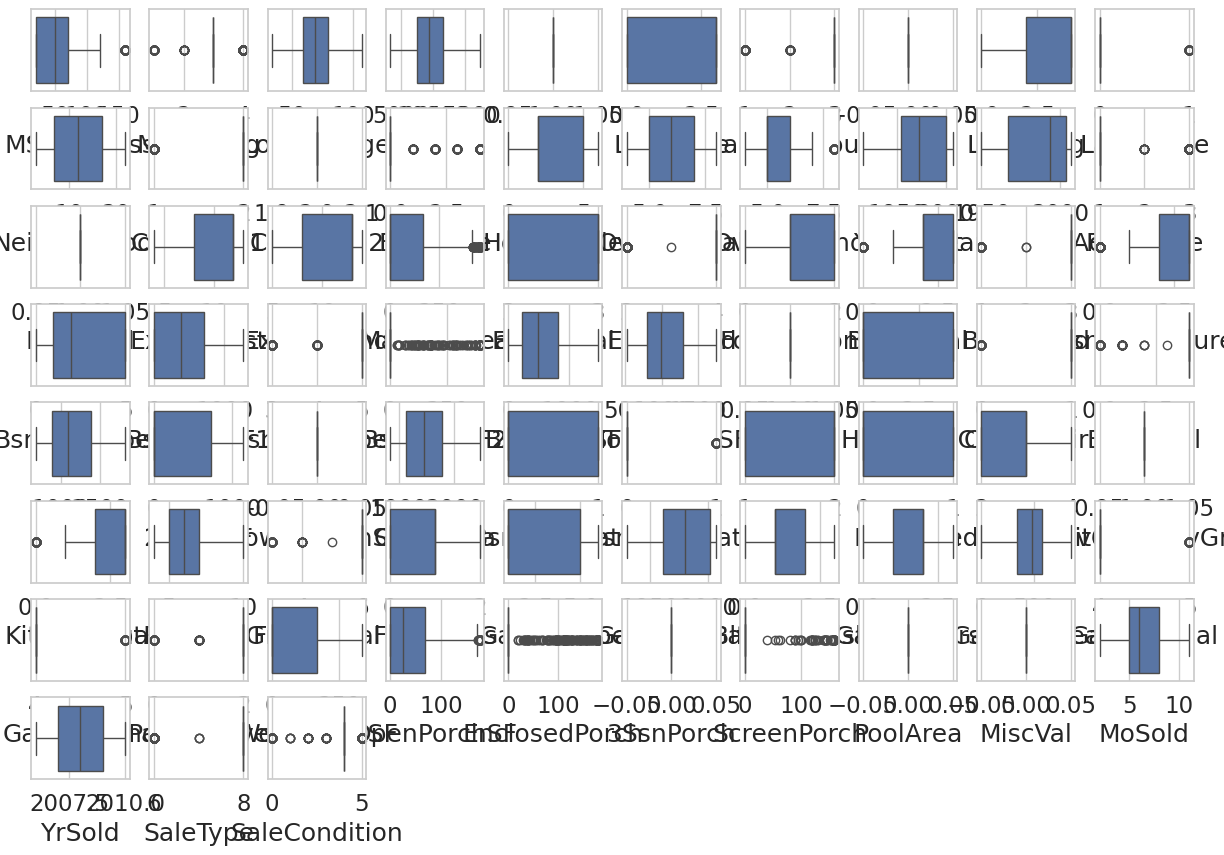

In [ ]:
plt.figure(figsize=(15,10))
c = df.columns[:-1]
for i in enumerate(c):
    plt.subplot(8,10,i[0]+1)
    sns.boxplot(x=i[1], data=df)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>,
        <Axes: title={'center': 'LotConfig'}>],
       [<Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
  

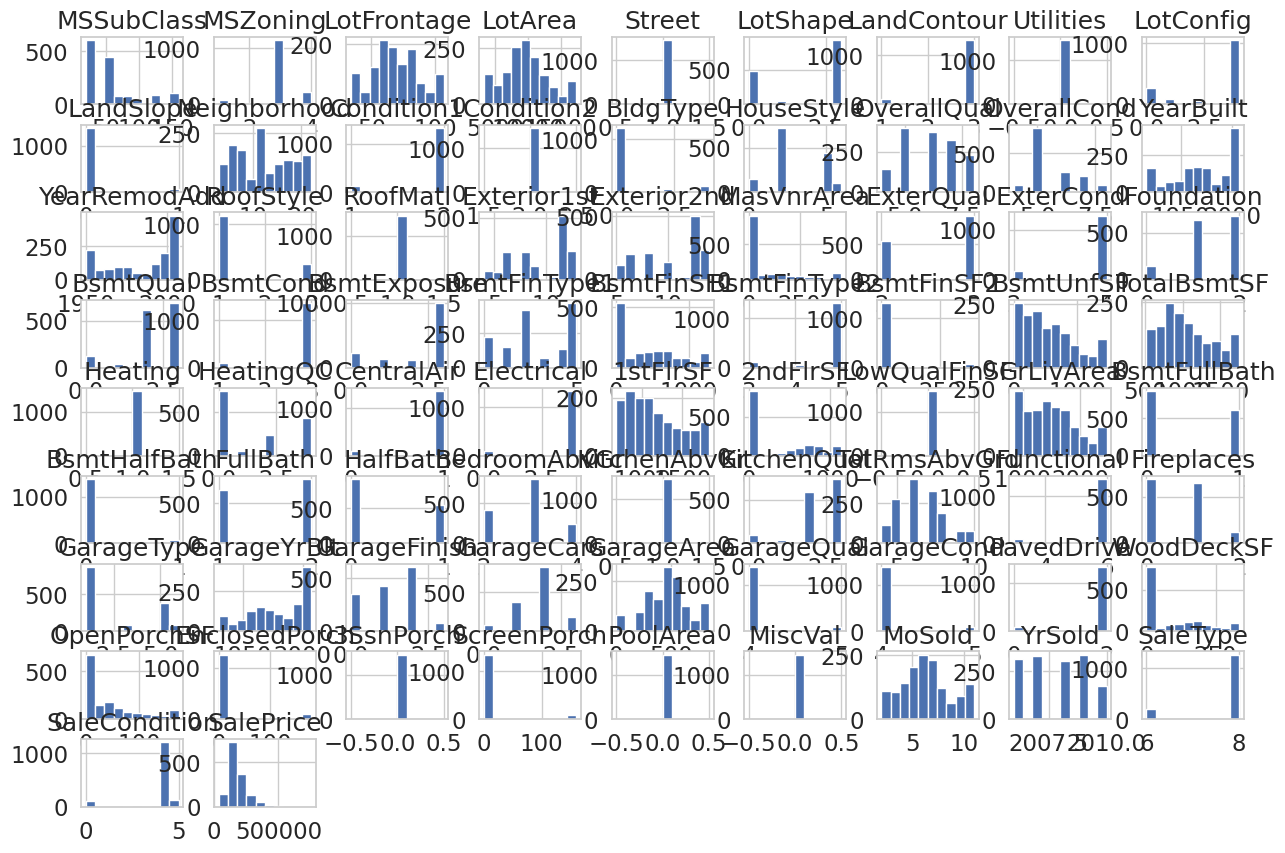

In [ ]:
df.hist(figsize = (15,10))

In [ ]:
X = df.drop(columns="SalePrice", axis=1)
y = df["SalePrice"]

In [ ]:
si = SimpleImputer(strategy="mean")
X = pd.DataFrame(si.fit_transform(X), columns=X.columns)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  Condition2     1460 non-null   float64
 13  BldgType       1460 non-null   float64
 14  HouseStyle     1460 non-null   float64
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

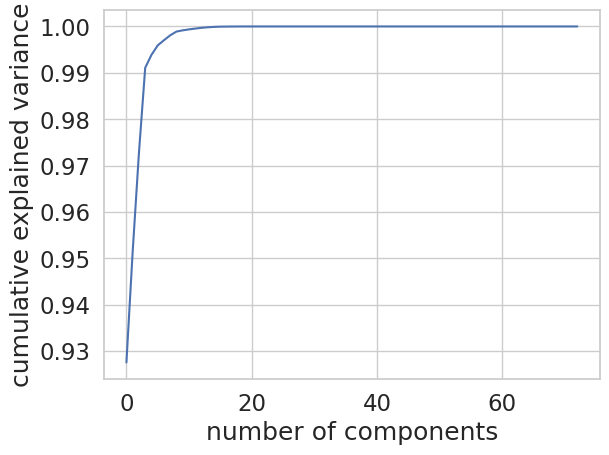

In [ ]:
# PRIMER GRAFICO
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<ipython-input-76-a9bd1d62c126>:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,75,1)


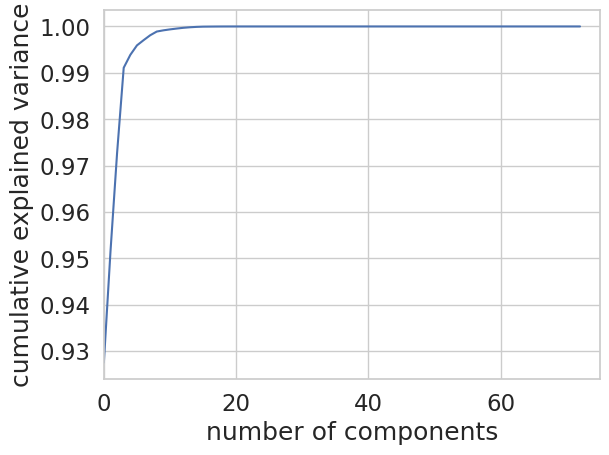

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,75,1)
plt.show()

In [ ]:
# PCA PARA REDUCIR CARACTERISTICAS, APLICAR TECNICA PARA REDUCIR
# DIMENSIONALIDAD SIN PERDER CARACTERISTICAS
pcaX = PCA(n_components=20).fit_transform(X)

In [ ]:
pcaX

array([[-1.22367861e+03,  1.76015864e+02, -2.67249657e+02, ...,
        -4.97451362e+00,  2.90422331e-01, -7.91767864e+00],
       [-7.61992246e+01, -6.26364218e+02,  3.82856985e+02, ...,
         6.39043540e+00, -6.60253797e-01,  1.04205623e+01],
       [ 1.57298027e+03,  3.18645143e+02, -3.89886614e+02, ...,
        -6.82731018e+00, -8.13435379e-01, -7.60882924e+00],
       ...,
       [-5.79854786e+02,  1.15383799e+03,  1.43600070e+01, ...,
         1.30816732e+01, -1.40350155e+01, -4.01452646e+00],
       [-1.41960398e+01, -5.88045486e+02, -3.27297478e+02, ...,
         1.21539738e+01, -1.25721442e+01,  5.65039083e-01],
       [ 2.50877719e+02, -6.80639961e+02,  2.31723666e+02, ...,
        -3.99432517e-02, -1.27837011e+00, -4.36577992e+00]])

In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pcaX, y, test_size=0.3, random_state=5)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
#ann.add(Dense(units=1))
#ann = Sequential()
#ann.add(Dense(units=15, activation='relu'))
#ann.add(Dense(units=8, activation='relu'))
#ann.compile(optimizer='adam', loss='mse')
#ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=100)

#ann = Sequential()
#ann.add(Dense(units=90, activation='sigmoid'))
#ann.add(Dense(units=1, activation='sigmoid'))
#ann.add(Dense(units=1))
#ann.compile(optimizer='adam', loss='mse')
#ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=100)

ann.add(Dense(units=1))
ann = Sequential()
ann.add(Dense(units=15, activation='relu'))
ann.add(Dense(units=8, activation='relu'))
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=100)

Epoch 1/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 40815603712.0000 - val_loss: 37254881280.0000
Epoch 2/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40221253632.0000 - val_loss: 35852275712.0000
Epoch 3/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38613610496.0000 - val_loss: 33329829888.0000
Epoch 4/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33145763840.0000 - val_loss: 30271082496.0000
Epoch 5/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 32055447552.0000 - val_loss: 27066568704.0000
Epoch 6/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27551461376.0000 - val_loss: 24014968832.0000
Epoch 7/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24003074048.0000 - val_loss: 21337079808.0000
Epoch 8/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21920718848.0000 - val_loss: 19067570176.0000
Epoch 9/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19073740800.0000 - val_loss: 17420107776.0000
Epoch 10/100
205/205 ━━━━━━━━━━━━━━━━

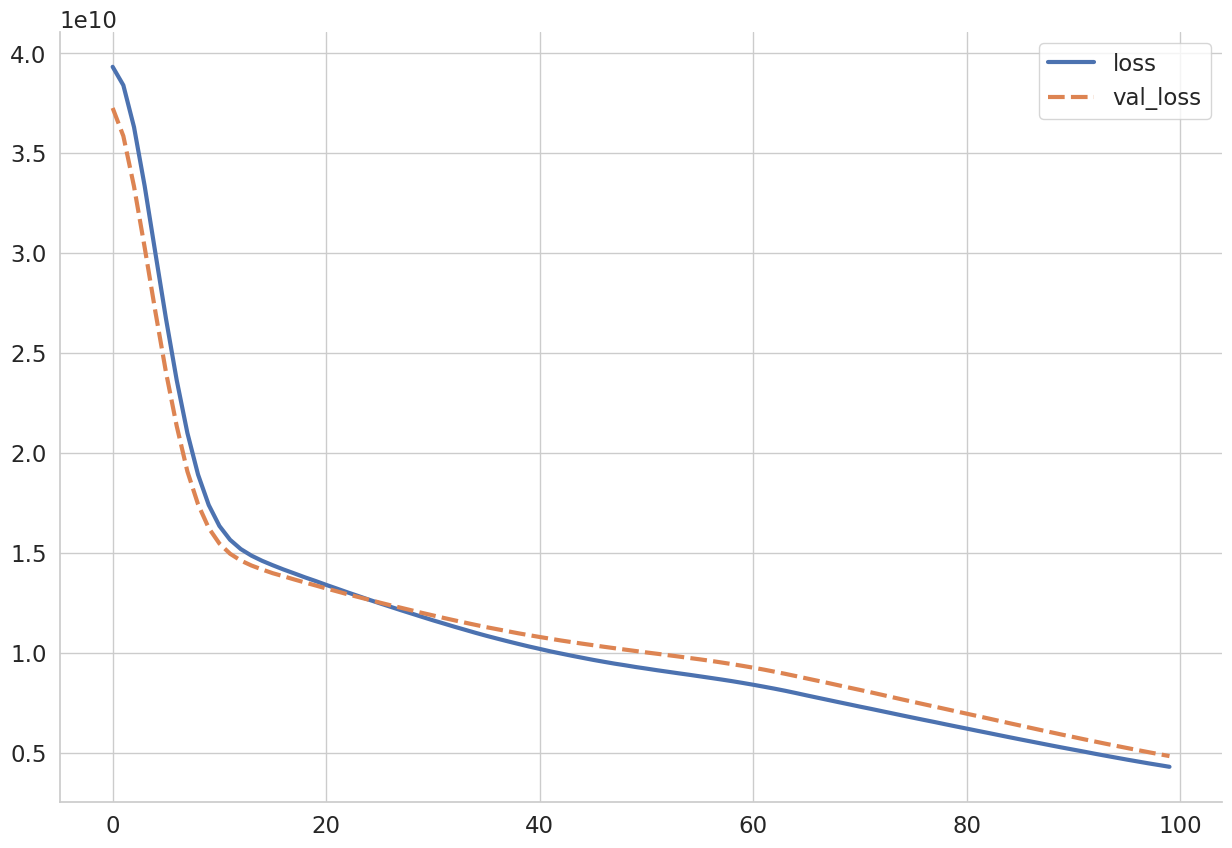

In [ ]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15, 10))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [ ]:
y_predict = ann.predict(X_train)
errorAbsoluto = mean_absolute_error(y_train, y_predict)
print(errorAbsoluto)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ValueError: y_true and y_pred have different number of output (1!=8)

In [ ]:
y_predict_test = ann.predict(X_test)
errorAbsoluto = mean_absolute_error(y_test, y_predict_test)
print(errorAbsoluto)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ValueError: y_true and y_pred have different number of output (1!=8)